In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'stix'
import numpy as np
from scipy.ndimage import gaussian_filter

In [7]:
def get_Sq_data(folder, param):
    Sqs = []
    qBs = []
    for L, kappa, f, gL in param:
        finfo = f"L{L}_kappa{kappa:.1f}_f{f:.2f}_gL{gL:.2f}"
        filename = f"{folder}/obs_{finfo}.csv"
        print(filename)
        data = np.genfromtxt(filename, delimiter=",", skip_header=1)
        Sq = data[0, 21:]
        qB = data[2, 21:]
        Sqs.append(Sq)
        qBs.append(qB)
    return np.array(Sqs), np.array(qBs)

In [8]:
def calc_Sq_discrete_infinite_thin_rod(q, L):
    # numereical calculation
    Sq = [1.0 / L for i in range(len(q))]
    for k in range(len(q)):
        Sqk = 0
        qk = q[k]
        for i in range(L - 1):
            for j in range(i + 1, L):
                Sqk += 2.0 * np.sin(qk * (i - j)) / (qk * (i - j)) / (L * L)
        Sq[k] += Sqk
    return np.array(Sq)


In [61]:
def plot_Sq(tex_lw=240.71031, ppi=72):
    fig = plt.figure(figsize=(tex_lw / ppi * 1, tex_lw / ppi * 1))
    ax00 = plt.subplot2grid((1, 1), (0, 0))

    ms = 4
    labelpad = -0.0
    folder = "../data/20250219"
    L = 200
    gammas = [0.0, 0.3, 0.9]
    param = [(L, 10.0, 0.0, gamma) for gamma in gammas]
    Sqs, qBs = get_Sq_data(folder, param)
    Sq_rod = calc_Sq_discrete_infinite_thin_rod(qBs[0], L)
    for i in range(len(gammas)):
        ax00.loglog(qBs[i]*L, Sqs[i], "-", lw=2, label=f"{gammas[i]:.01f}")
    ax00.loglog(qBs[0]*L, Sq_rod, "k--", lw=2, label="rod")
    ax00.set_xlabel(r"$QL$", fontsize=20, labelpad=labelpad)
    ax00.set_ylabel(r"$I_0^0(QL)$", fontsize=20, labelpad=labelpad)
    ax00.legend(title=r"$\gamma L$", ncol=1, columnspacing=0.5, handlelength=1, handletextpad=0.2, frameon=False, fontsize=18, title_fontsize=18, loc = 'lower left')
    ax00.tick_params(which="both", direction="in", top="on", right="on", labelbottom=True, labelleft=True, labelsize=18)
    # ax00.set_xticks([0.1, 1, 10])  # Example x-ticks, adjust as needed
    # ax00.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    xlims = [1e-1, 1e3]
    ylims = [1e-3, 2e0]
    ax00.set_xlim(xlims)
    ax00.set_ylim(ylims)
    ax00.set_aspect(np.log(xlims[1] / xlims[0]) / np.log(ylims[1] / ylims[0]))

    plt.tight_layout(pad=0.05)
    plt.show()
    plt.close()


../data/20250219/obs_L200_kappa10.0_f0.00_gL0.00.csv
../data/20250219/obs_L200_kappa10.0_f0.00_gL0.30.csv
../data/20250219/obs_L200_kappa10.0_f0.00_gL0.90.csv


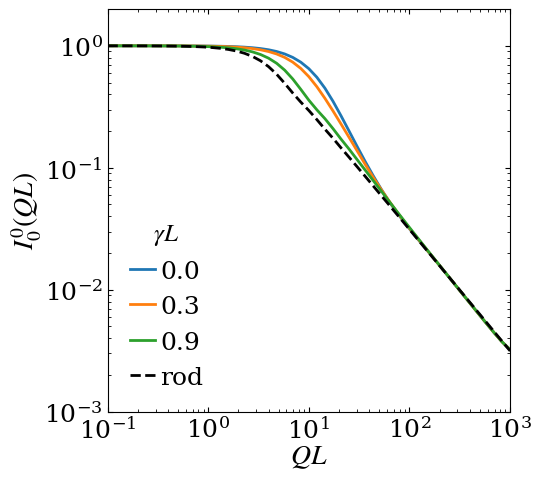

In [62]:
plot_Sq(tex_lw=750, ppi=144)